### Readme
notebook que carga y analiza el fichero JSON con información de repositorios
los datos se han obtenido via API GraphQL y REST API de github

### Carga de librerías y fichero de datos. comprobaciones básicas

In [1]:
# imports de librerías requeridas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import json
from tabulate import tabulate
import locale

In [3]:
#pd.set_option('display.precision', 2)  # Configurar la precisión de decimales

# Configurar la visualización para que los números se muestren en formato europeo
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',', 'X').replace('.', ',').replace('X', '.'))

In [4]:
#DATA_FILE='D:\\Dev\\github-scrapping-02\\Data\\xmerge-metadata.json'
DATA_FILE='D:\\Dev\\github-scrapping-02\\Data\\df_clean.json'

In [5]:
# Leer el archivo JSON y convertir las columnas de fecha
df = pd.read_json(DATA_FILE, orient='records', lines=True, convert_dates=['createdAt', 'pushedAt', 'updatedAt'])

In [6]:
# crear copia de seguridad
df_copy=df.copy()

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37120 entries, 0 to 37119
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    37120 non-null  object        
 1   description             35030 non-null  object        
 2   stargazerCount          37120 non-null  int64         
 3   forkCount               37120 non-null  int64         
 4   createdAt               37120 non-null  datetime64[ns]
 5   updatedAt               37120 non-null  datetime64[ns]
 6   pushedAt                37120 non-null  datetime64[ns]
 7   diskUsage               37120 non-null  int64         
 8   isArchived              37120 non-null  bool          
 9   isEmpty                 37120 non-null  bool          
 10  isFork                  37120 non-null  bool          
 11  isInOrganization        37120 non-null  bool          
 12  isPrivate               37120 non-null  bool  

In [8]:
print(len(df_copy))

37120


In [9]:
df_copy.head()

,name,description,stargazerCount,forkCount,createdAt,updatedAt,pushedAt,diskUsage,isArchived,isEmpty,...,forks,assignableUsers,deployments,environments,milestones,releases,pullRequests,watchers,reponame,language_count
0,Parsr,"Transforms PDF, Documents and Images into Enri...",5755,306,2019-08-05 12:43:53,2024-09-01 17:24:35,2023-12-03 13:27:21,55148,False,False,...,305,4,0,0,0,26,504,81,axa-group/Parsr,5
1,Yet-Another-EfficientDet-Pytorch,The pytorch re-implement of the official effic...,5200,1268,2020-04-06 03:27:06,2024-08-22 08:04:26,2021-10-24 02:13:31,9068,False,False,...,1251,1,0,0,0,4,37,108,zylo117/Yet-Another-EfficientDet-Pytorch,2
2,nit,Git of Web3 assets,4452,8,2022-04-20 08:21:14,2024-08-08 16:18:20,2024-07-29 14:17:11,548,False,False,...,8,4,0,0,0,4,13,12,numbersprotocol/nit,2
3,new.css,A classless CSS framework to write modern webs...,3946,127,2020-05-03 03:18:57,2024-09-01 17:29:23,2024-03-16 08:40:48,310,False,False,...,112,1,100,2,0,1,43,39,xz/new.css,2
4,golang-notes,Go source code analysis(zh-cn),3941,667,2018-04-04 05:21:51,2024-08-31 01:40:45,2022-07-18 09:30:00,8118,False,False,...,658,1,0,0,0,0,39,186,cch123/golang-notes,4


### Análisis de serie temporal

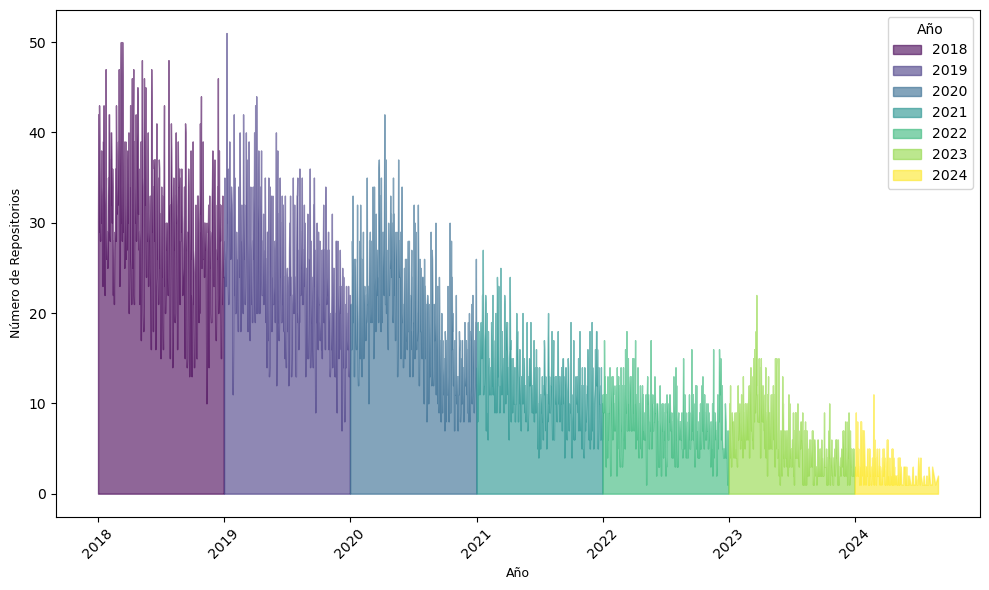

In [19]:
# ¿Cuántos repos se crean diariamente?


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Agrupar por fecha (contando el número de repositorios creados por día)
df_daily = df_copy.groupby(df_copy['createdAt'].dt.date).size()

# Convertir el índice a datetime
df_daily.index = pd.to_datetime(df_daily.index)

# Crear un nuevo DataFrame para poder trabajar con los años
df_daily_df = df_daily.reset_index(name='repos')
df_daily_df['year'] = df_daily_df['createdAt'].dt.year

# Definir los colores para cada año
unique_years = df_daily_df['year'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))  # Colores de la colormap viridis

# Crear gráfico de área
plt.figure(figsize=(10, 6))

# Dibujar el área para cada año
for year, color in zip(unique_years, colors):
    yearly_data = df_daily_df[df_daily_df['year'] == year]
    plt.fill_between(yearly_data['createdAt'], yearly_data['repos'], color=color, alpha=0.6, label=str(year))

# Personalizar el gráfico
#plt.title('Número de Repositorios Creados por Día', fontsize=10)
plt.xlabel('Año', fontsize=9)
plt.ylabel('Número de Repositorios', fontsize=9)
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()


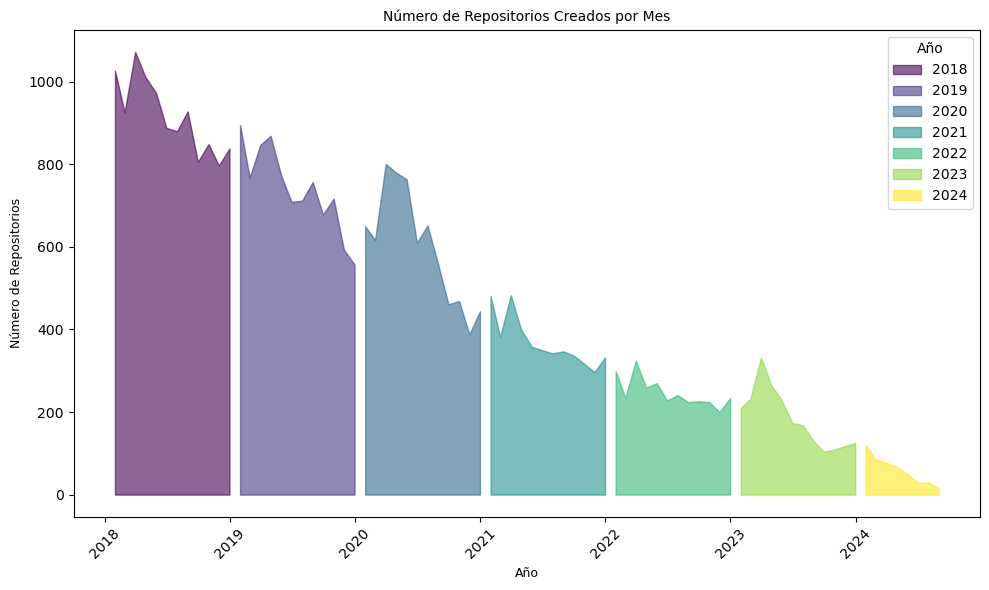

In [23]:
# Por meses

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Agrupar por mes (contando el número de repositorios creados por mes)
df_monthly = df_copy.groupby(pd.Grouper(key='createdAt', freq='ME')).size()

# Convertir el índice a datetime
df_monthly.index = pd.to_datetime(df_monthly.index)

# Crear un nuevo DataFrame para trabajar con los meses
df_monthly_df = df_monthly.reset_index(name='repos')
df_monthly_df['year'] = df_monthly_df['createdAt'].dt.year
df_monthly_df['month'] = df_monthly_df['createdAt'].dt.month

# Definir los colores para cada año
unique_years = df_monthly_df['year'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))  # Colores de la colormap viridis

# Crear gráfico de área
plt.figure(figsize=(10, 6))

# Dibujar el área para cada año
for year, color in zip(unique_years, colors):
    yearly_data = df_monthly_df[df_monthly_df['year'] == year]
    plt.fill_between(yearly_data['createdAt'], yearly_data['repos'], color=color, alpha=0.6, label=year)

# Personalizar el gráfico
plt.title('Número de Repositorios Creados por Mes', fontsize=10)
plt.xlabel('Año', fontsize=9)
plt.ylabel('Número de Repositorios', fontsize=9)
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()


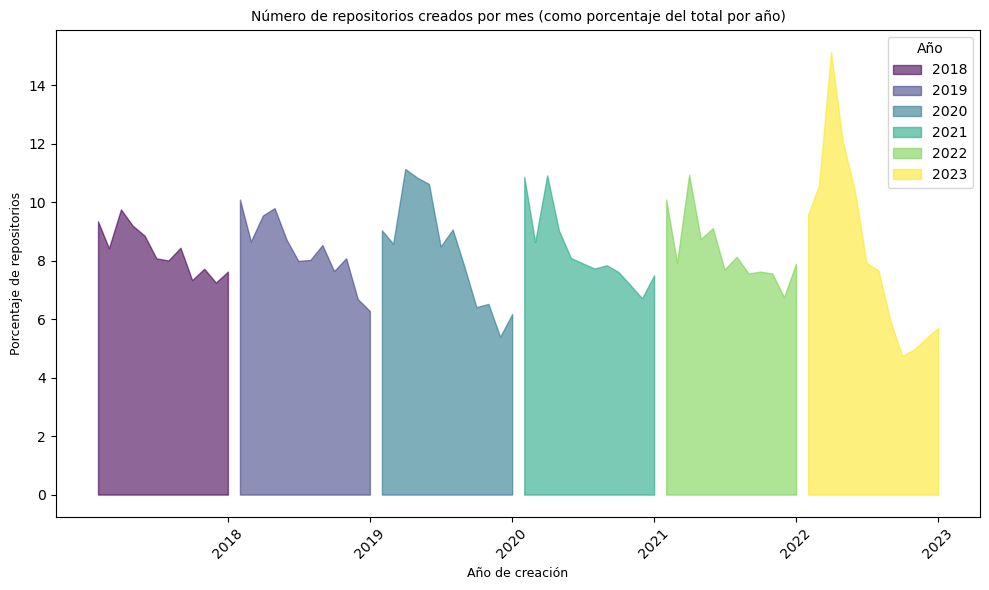

In [45]:
# Por meses, PERO evitando el efecto de repos creados dismu¡inuyen cada año
# Normalizando los datos



# Agrupar por mes (contando el número de repositorios creados por mes)
df_monthly = df_copy.groupby(pd.Grouper(key='createdAt', freq='ME')).size()

# Convertir el índice a datetime
df_monthly.index = pd.to_datetime(df_monthly.index)

# Crear un nuevo DataFrame para trabajar con los meses
df_monthly_df = df_monthly.reset_index(name='repos')
df_monthly_df['year'] = df_monthly_df['createdAt'].dt.year
df_monthly_df['month'] = df_monthly_df['createdAt'].dt.month

# Filtrar para eliminar el año 2024
df_monthly_df = df_monthly_df[df_monthly_df['year'] < 2024]

# Calcular el total de repositorios por año
total_repos_by_year = df_monthly_df.groupby('year')['repos'].transform('sum')

# Normalizar el número de repositorios por el total de cada año
df_monthly_df['repos_percentage'] = (df_monthly_df['repos'] / total_repos_by_year) * 100

# Definir los colores para cada año
unique_years = df_monthly_df['year'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))  # Colores de la colormap viridis

# Crear gráfico de área
plt.figure(figsize=(10, 6))

# Dibujar el área para cada año
for year, color in zip(unique_years, colors):
    yearly_data = df_monthly_df[df_monthly_df['year'] == year]
    plt.fill_between(yearly_data['createdAt'], yearly_data['repos_percentage'], color=color, alpha=0.6, label=year)

# Personalizar el gráfico
plt.title('Número de repositorios creados por mes (como porcentaje del total por año)', fontsize=10)
plt.xlabel('Año de creación', fontsize=9)
plt.ylabel('Porcentaje de repositorios', fontsize=9)
plt.xticks(rotation=45)

# Ajustar ticks y etiquetas para centrar los años
plt.xticks(ticks=pd.date_range(start=df_monthly_df['createdAt'].min(), 
                                 end=df_monthly_df['createdAt'].max(), 
                                 freq='YE'), 
           labels=range(df_monthly_df['year'].min(), df_monthly_df['year'].max() + 1))

plt.legend(title='Año')
plt.tight_layout()
plt.show()




In [47]:
df_monthly

createdAt
2018-01-31    1027
2018-02-28     926
2018-03-31    1072
2018-04-30    1011
2018-05-31     973
              ... 
2024-04-30      68
2024-05-31      50
2024-06-30      28
2024-07-31      30
2024-08-31      15
Freq: ME, Length: 80, dtype: int64

Proporciones Mensuales de Repositorios Creados por Año:
year       2018  2019  2020  2021  2022  2023
month                                        
January    9,34 10,08  9,04 10,87 10,09  9,57
February   8,42  8,65  8,58  8,63  7,93 10,57
March      9,75  9,54 11,13 10,91 10,93 15,13
April      9,20  9,79 10,84  9,04  8,74 12,08
May        8,85  8,71 10,62  8,09  9,11 10,39
June       8,08  7,99  8,48  7,91  7,69  7,93
July       8,00  8,02  9,06  7,73  8,13  7,66
August     8,44  8,53  7,76  7,84  7,56  5,93
September  7,33  7,64  6,41  7,61  7,62  4,74
October    7,72  8,08  6,52  7,16  7,56  4,97
November   7,25  6,68  5,39  6,71  6,75  5,33
December   7,62  6,28  6,17  7,50  7,89  5,70


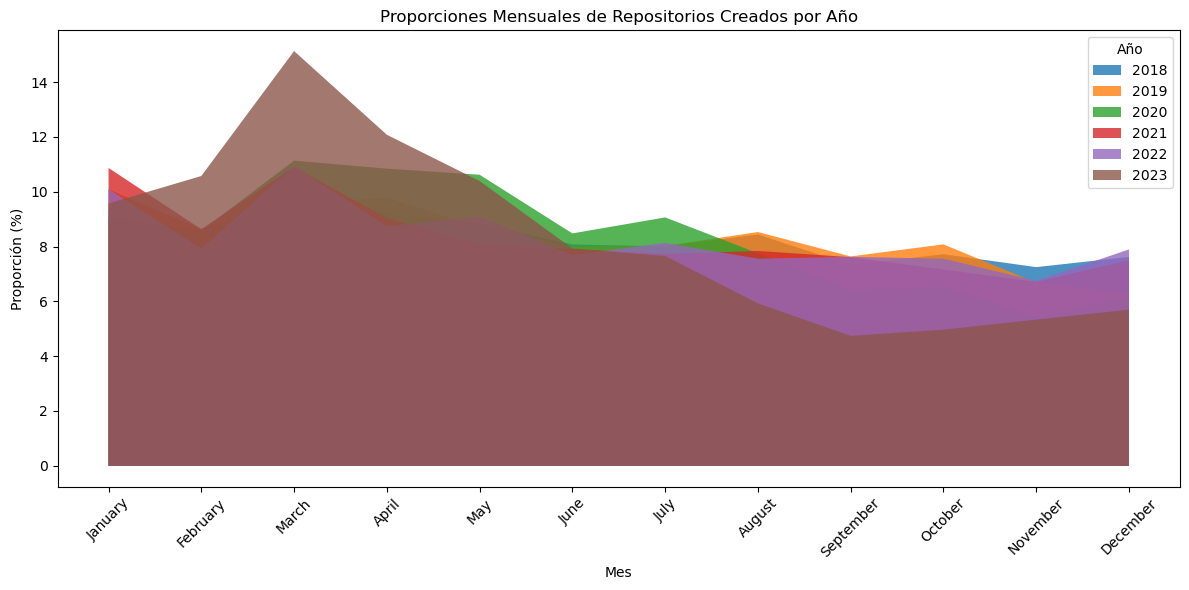

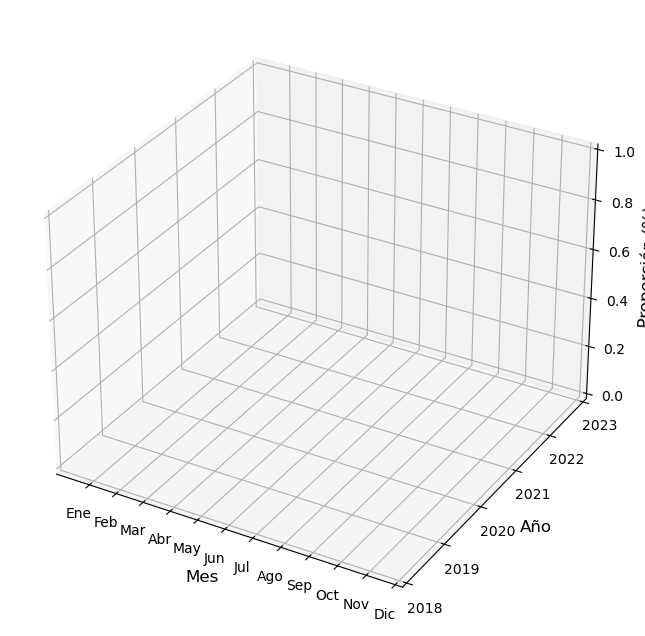

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

# Agrupar por mes y año (contando el número de repositorios creados por mes)
df_monthly = df_copy.groupby(pd.Grouper(key='createdAt', freq='ME')).size()

# Convertir a DataFrame y renombrar la columna
df_monthly = df_monthly.reset_index(name='repos')

# Extraer el año y el mes
df_monthly['year'] = df_monthly['createdAt'].dt.year
df_monthly['month'] = df_monthly['createdAt'].dt.month_name()

# Filtrar para dejar fuera el año 2024
df_monthly = df_monthly[df_monthly['year'] != 2024]

# Calcular el total de repositorios creados por año
total_repos_by_year = df_monthly.groupby('year')['repos'].sum().reset_index(name='total_repos')

# Unir el total de repos por año con el DataFrame mensual
df_monthly = df_monthly.merge(total_repos_by_year, on='year')

# Calcular la proporción de repositorios creados por mes respecto al total de ese año
df_monthly['repos_percentage'] = (df_monthly['repos'] / df_monthly['total_repos']) * 100

# Crear la tabla de proporciones
table = df_monthly.pivot(index='month', columns='year', values='repos_percentage')

# Reordenar los meses en el índice
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
table = table.reindex(months_order)

# Mostrar la tabla de proporciones mensuales
print("Proporciones Mensuales de Repositorios Creados por Año:")
print(table)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Dibujar el área para cada año
for year in table.columns:
    plt.fill_between(table.index, table[year], label=year, alpha=0.8)

# Personalizar el gráfico
plt.title('Proporciones Mensuales de Repositorios Creados por Año', fontsize=12)
plt.xlabel('Mes', fontsize=10)
plt.ylabel('Proporción (%)', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()


# Crear el gráfico de área apilada 3D
months_numbers = [i for i in range(1, 13)]  # Números del 1 al 12 para los meses

# Preparar los datos para el gráfico 3D
months = months_numbers  # Usar los números de los meses
years = table.columns.values  # Años
values = table.values  # Proporciones mensuales

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear polígonos para el gráfico 3D apilado
verts = []
for i in range(len(years)):
    y = values[:, i]
    verts.append(list(zip(months, y)))

# Crear las áreas apiladas en 3D
poly = PolyCollection(verts, facecolors=plt.cm.viridis(np.linspace(0, 1, len(years))), alpha=0.7)

# Ajustar el eje Z
ax.add_collection3d(poly, zs=years, zdir='y')

# Configurar los ejes
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Año', fontsize=12)
ax.set_zlabel('Proporción (%)', fontsize=12)
ax.set_yticks(years)
ax.set_xticks(months)
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax.set_ylim([years.min(), years.max()])

# Mostrar gráfico
plt.show()


In [50]:
df_monthly

,createdAt,repos,year,month,total_repos,repos_percentage
0,2018-01-31,1027,2018,January,10995,"9,34"
1,2018-02-28,926,2018,February,10995,"8,42"
2,2018-03-31,1072,2018,March,10995,"9,75"
3,2018-04-30,1011,2018,April,10995,"9,20"
4,2018-05-31,973,2018,May,10995,"8,85"
...,...,...,...,...,...,...
75,2024-04-30,68,2024,April,472,"14,41"
76,2024-05-31,50,2024,May,472,"10,59"
77,2024-06-30,28,2024,June,472,"5,93"
78,2024-07-31,30,2024,July,472,"6,36"


In [44]:
# Estadísticas generales de repos creados por fecha


# Agrupar por mes (contando el número de repositorios creados por mes)
df_monthly = df_copy.groupby(pd.Grouper(key='createdAt', freq='ME')).size()

# Convertir a DataFrame y renombrar la columna
df_monthly = df_monthly.reset_index(name='repos')

# Calcular estadísticas descriptivas globales
stats = df_monthly['repos'].describe()

# Obtener la fecha de los mínimos y máximos
min_repos_row = df_monthly.loc[df_monthly['repos'].idxmin()]
max_repos_row = df_monthly.loc[df_monthly['repos'].idxmax()]

# Cálculo de estadísticas
mean_repos = df_monthly['repos'].mean()
median_repos = df_monthly['repos'].median()
min_repos = min_repos_row['repos']
max_repos = max_repos_row['repos']
min_date = min_repos_row['createdAt']
max_date = max_repos_row['createdAt']
std_repos = df_monthly['repos'].std()

# Calcular estadísticas mensuales
monthly_stats = df_monthly.groupby(df_monthly['createdAt'].dt.month)['repos'].agg(['mean', 'median', 'std']).reset_index()

# Renombrar la columna del mes y ajustar el índice para que comience desde 1
monthly_stats['month'] = monthly_stats['createdAt'].apply(lambda x: pd.to_datetime(f'2023-{x}-01').strftime('%B'))
monthly_stats.index = monthly_stats.index + 1  # Ajustar índice para que comience en 1
monthly_stats = monthly_stats.rename(columns={'createdAt': 'Mes'})

# Calcular repositorios creados por año
df_yearly = df_copy.groupby(df_copy['createdAt'].dt.year).size().reset_index(name='repos_por_año')

# Mostrar estadísticas
print("Estadísticas de creación de repositorios por mes:")
print(f"Total de meses analizados: {len(df_monthly)}")
print(f"Promedio mensual de repositorios: {mean_repos:.2f}")
print(f"Mediana de repositorios por mes: {median_repos:.2f}")
print(f"Mínimo de repositorios creados en un mes: {min_repos} (Fecha: {min_date.date()})")
print(f"Máximo de repositorios creados en un mes: {max_repos} (Fecha: {max_date.date()})")
print(f"Desviación estándar de repositorios por mes: {std_repos:.2f}")
print("\nEstadísticas descriptivas:")
print(stats)

# Mostrar estadísticas resumidas por mes
print("\nEstadísticas resumidas por mes:")
print(monthly_stats[['Mes', 'mean', 'median', 'std']])

# Mostrar repositorios creados por año
print("\nRepositorios creados por año:")
print(df_yearly)



Estadísticas de creación de repositorios por mes:
Total de meses analizados: 80
Promedio mensual de repositorios: 464.00
Mediana de repositorios por mes: 370.00
Mínimo de repositorios creados en un mes: 15 (Fecha: 2024-08-31)
Máximo de repositorios creados en un mes: 1072 (Fecha: 2018-03-31)
Desviación estándar de repositorios por mes: 298.83

Estadísticas descriptivas:
count      80,00
mean      464,00
std       298,83
min        15,00
25%       227,50
50%       370,00
75%       758,75
max     1.072,00
Name: repos, dtype: float64

Estadísticas resumidas por mes:
    Mes   mean  median    std
1     1 525,86  481,00 346,79
2     2 463,57  382,00 312,49
3     3 562,29  483,00 353,43
4     4 521,71  400,00 361,09
5     5 488,00  358,00 345,57
6     6 426,71  350,00 314,72
7     7 432,14  342,00 317,12
8     8 422,71  347,00 337,27
9     9 435,33  399,00 268,41
10   10 447,50  393,00 288,40
11   11 398,67  342,50 255,22
12   12 421,67  388,00 254,33

Repositorios creados por año:
   create

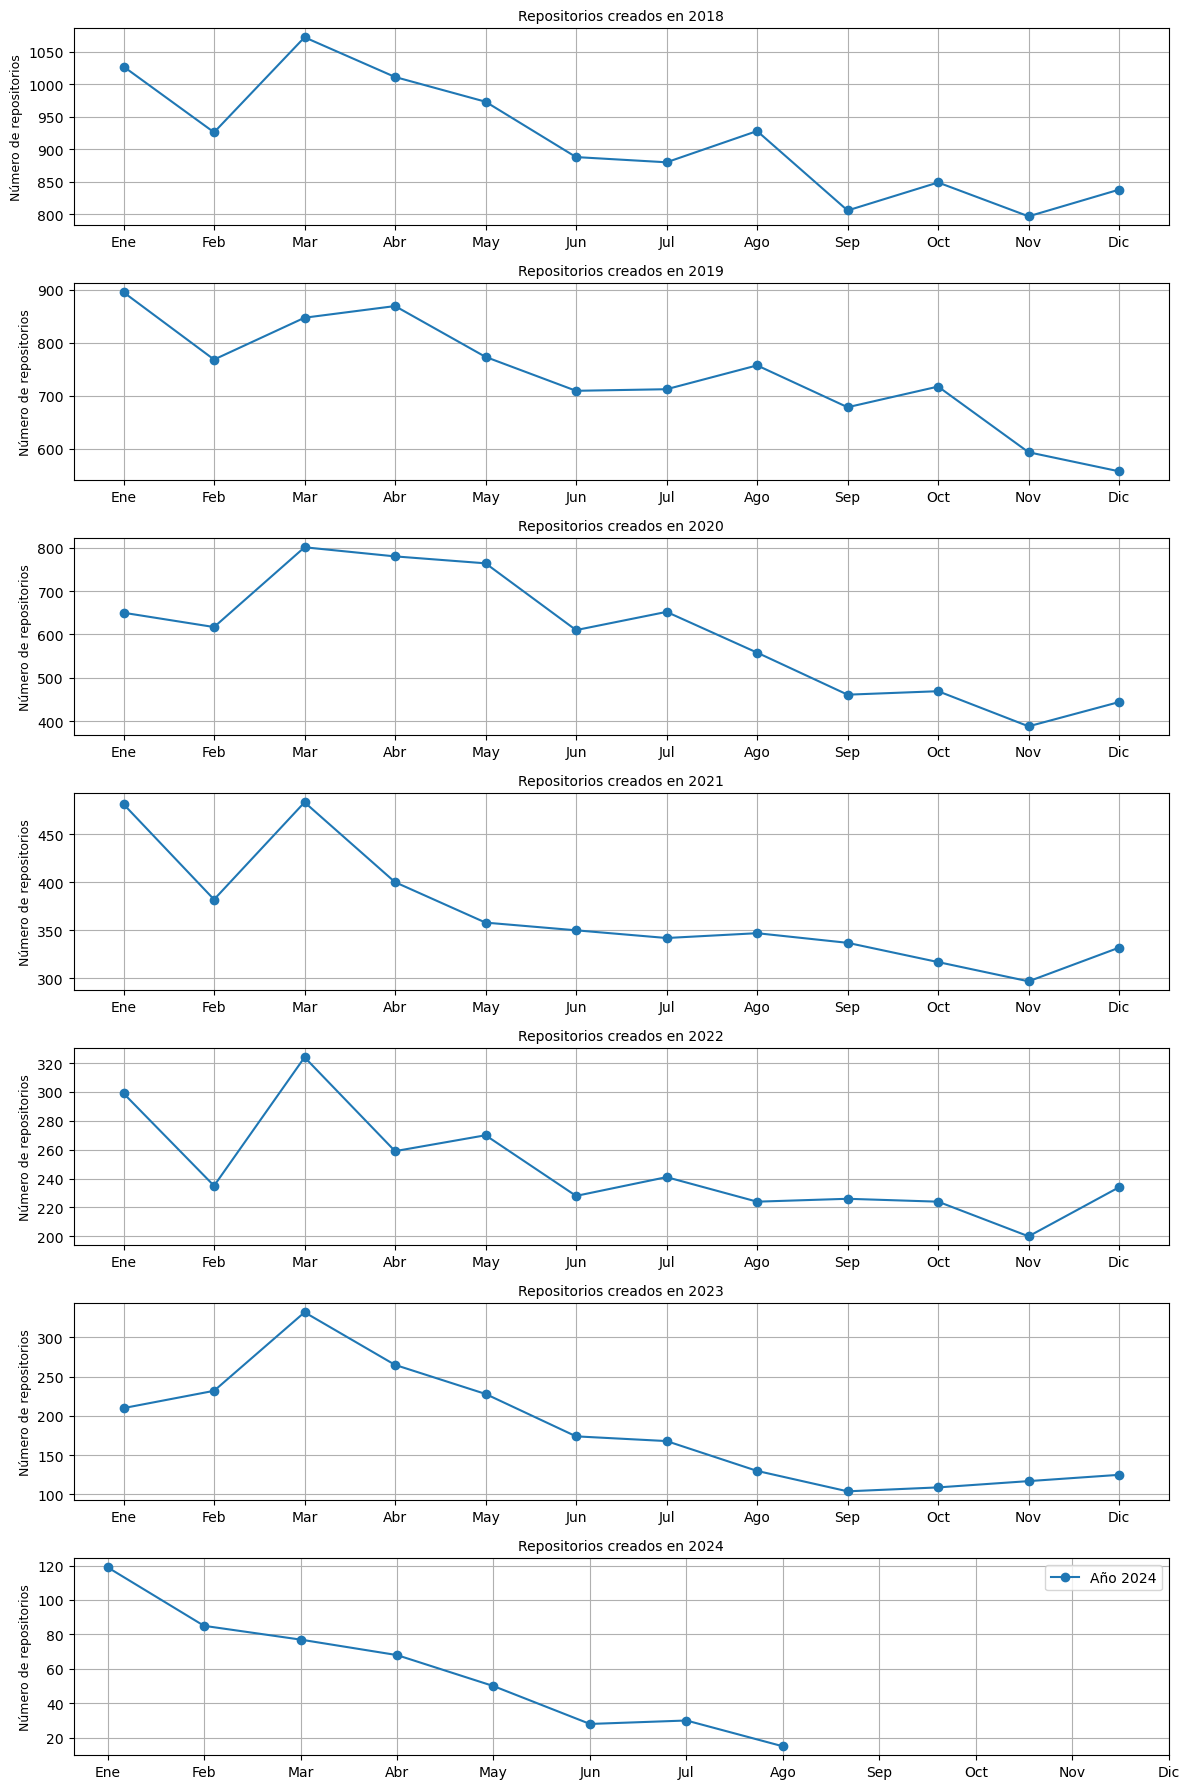

In [37]:
# Separar gráficos por años

# Agrupar por año (contando el número de repositorios creados por año)
df_yearly = df_copy.groupby(pd.Grouper(key='createdAt', freq='YE')).size()

# Configuración de la figura
num_years = len(df_yearly.index)  # Contar cuántos años hay
plt.figure(figsize=(12, 18))  # Ajustar el tamaño de la figura según el número de años

# Crear gráficos para cada año
for i, year in enumerate(df_yearly.index.year):
    # Filtrar datos para el año específico
    data_for_year = df_copy[df_copy['createdAt'].dt.year == year]
    
    # Agrupar por mes dentro del año
    df_monthly = data_for_year.groupby(data_for_year['createdAt'].dt.month).size()
    
    # Gráfico de línea para cada año
    plt.subplot(num_years, 1, i + 1)  # Usar num_years filas y 1 columna
    plt.plot(df_monthly.index, df_monthly.values, marker='o', label=f'Año {year}')
    plt.title(f'Repositorios creados en {year}', fontsize=10)
    #plt.xlabel('Mes', fontsize=10)
    plt.ylabel('Número de repositorios', fontsize=9)
    plt.xticks(range(1, 13), 
               ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.grid()
    plt.tight_layout()

# Ajustar la leyenda
plt.legend()
plt.show()


In [54]:
df_yearly.head()

createdAt
2018-01-31    1027
2018-07-31    5750
2019-01-31    5113
2019-07-31    4678
2020-01-31    3952
Freq: 6ME, dtype: int64

In [56]:
df_yearly.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 15 entries, 2018-01-31 to 2025-01-31
Freq: 6ME
Series name: None
Non-Null Count  Dtype
--------------  -----
15 non-null     int64
dtypes: int64(1)
memory usage: 240.0 bytes


In [59]:
# Comprobar el rango de años en df_yearly
start_year = df_yearly.index.min().year
end_year = df_yearly.index.max().year

print(f'Rango de años en df_yearly: {start_year} a {end_year}')


Rango de años en df_yearly: 2018 a 2025


In [62]:
df_yearly = df_copy.groupby(pd.Grouper(key='createdAt', freq='YE')).size()
# Comprobar el rango de años en df_yearly
start_year = df_yearly.index.min().year
end_year = df_yearly.index.max().year

print(f'Rango de años en df_yearly: {start_year} a {end_year}')

Rango de años en df_yearly: 2018 a 2024


In [68]:
df_yearly.sum()

37120

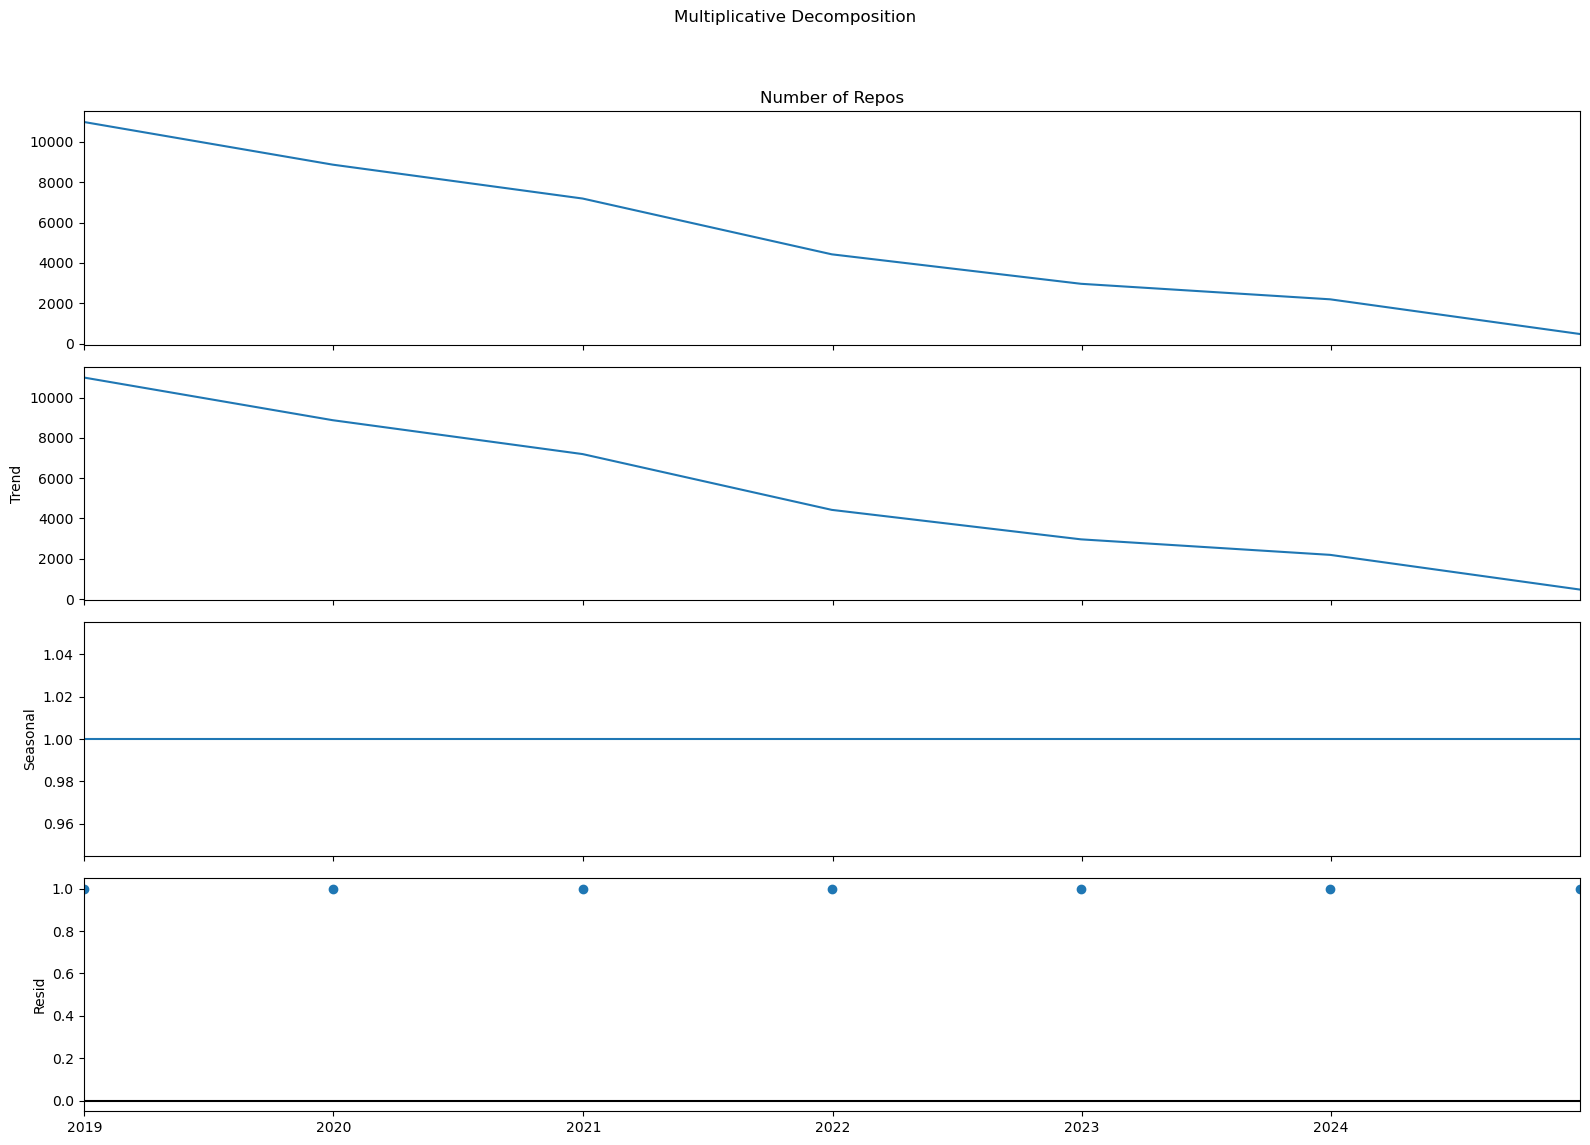

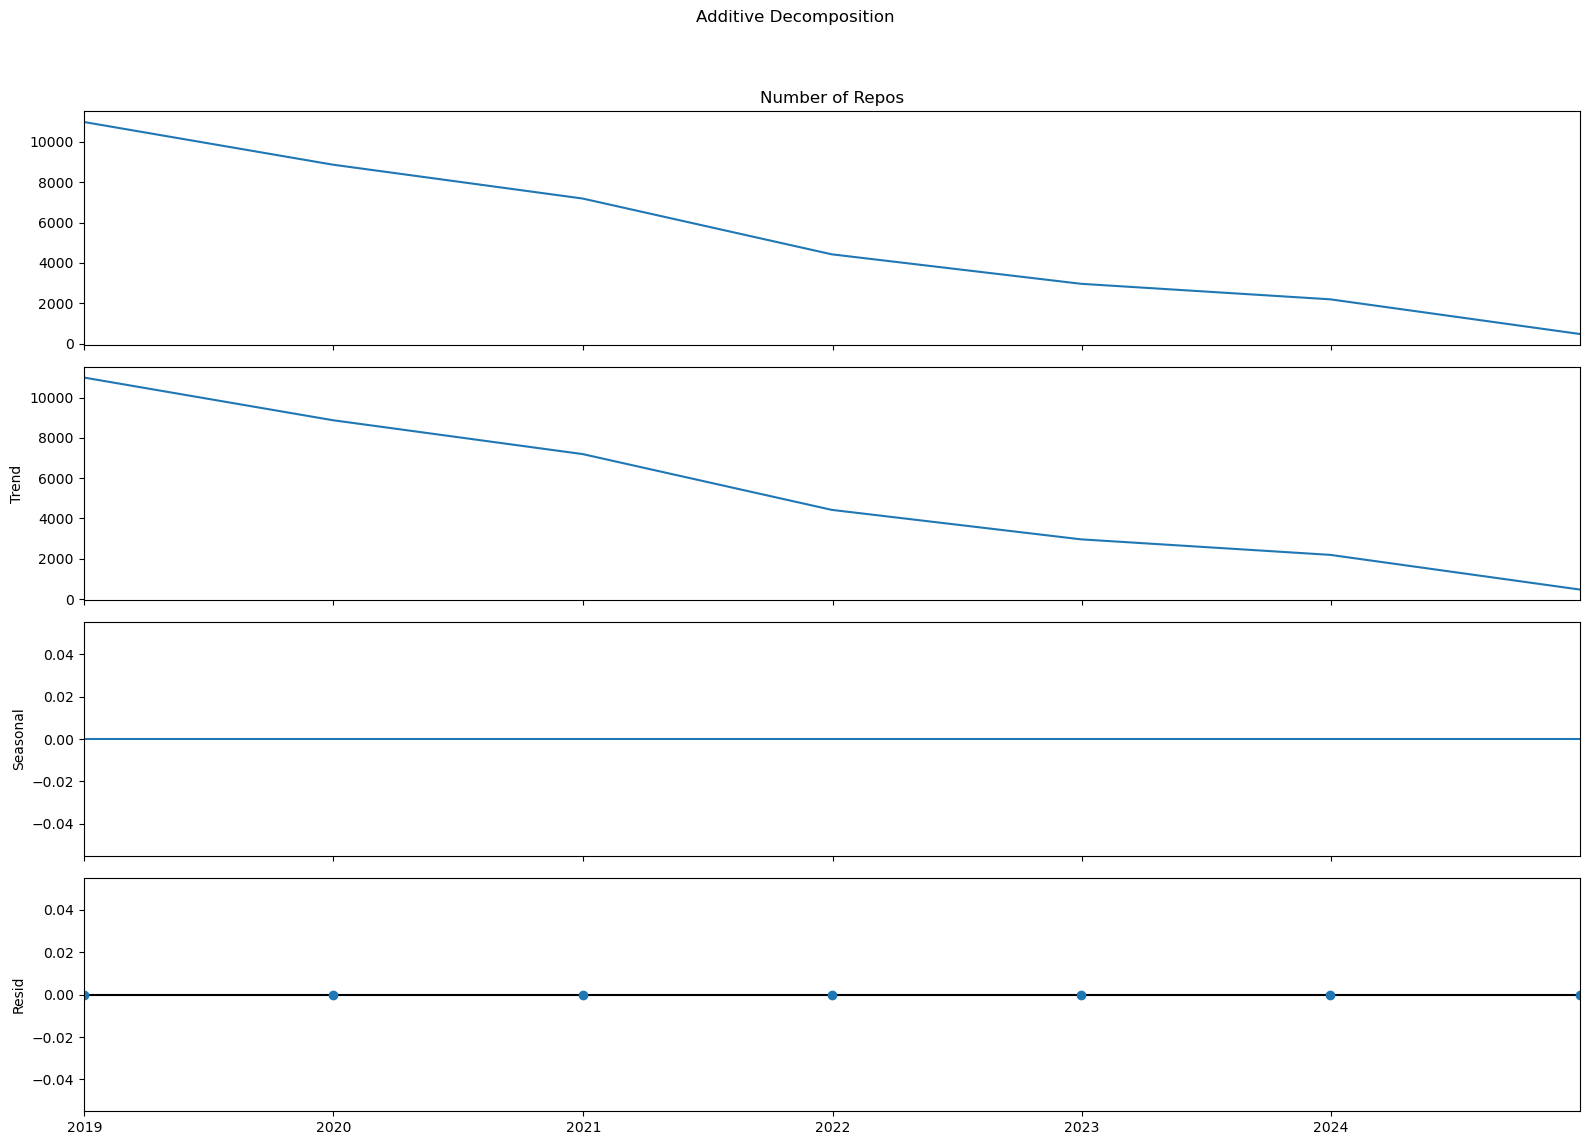

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Convertir df_yearly a un DataFrame
df_decomposable = pd.DataFrame({
    'createdAt': df_yearly.index,
    'Number of Repos': df_yearly.values
})

# Asegurarse de que la columna 'createdAt' sea del tipo datetime
df_decomposable['createdAt'] = pd.to_datetime(df_decomposable['createdAt'])

# Establecer la columna 'createdAt' como índice
df_decomposable.set_index('createdAt', inplace=True)

# Decomposición Multiplicativa
multiplicative_decomposition = seasonal_decompose(df_decomposable['Number of Repos'], model='multiplicative', period=1)

# Decomposición Aditiva
additive_decomposition = seasonal_decompose(df_decomposable['Number of Repos'], model='additive', period=1)

# Graficar
plt.rcParams.update({'figure.figsize': (16, 12)})

# Gráfico de descomposición multiplicativa
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Gráfico de descomposición aditiva
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


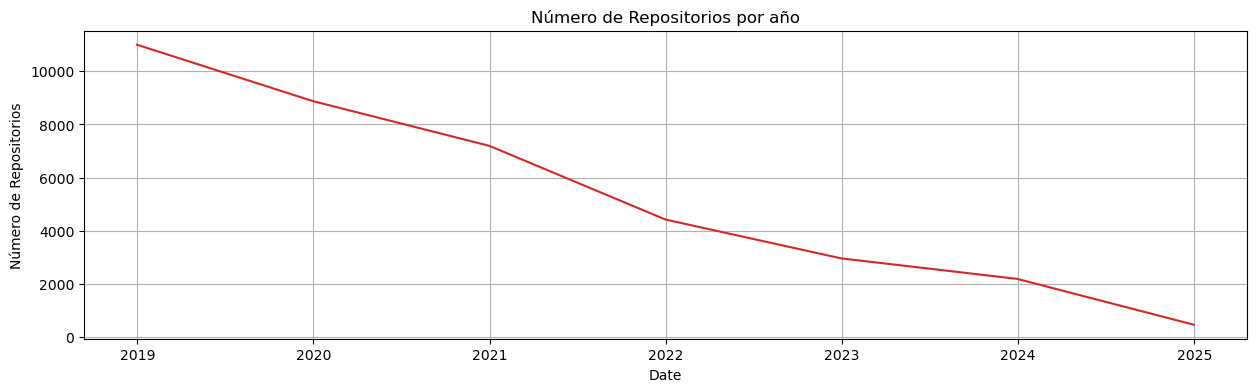

In [14]:
# Definir la función para graficar
def plot_df(series, title="", xlabel='Date', ylabel='Number of Repos', dpi=100):
    plt.figure(figsize=(15, 4), dpi=dpi)
    plt.plot(series.index, series.values, color='tab:red')  # Usar el índice como x y los valores como y
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid()
    plt.show()

# Llamar a la función con df_yearly
plot_df(df_yearly, title="Número de Repositorios por año", ylabel='Número de Repositorios')